In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("J:/Data science/data/countries.csv")

In [3]:
df.head()

,country,latitude,longitude,language
0,USA,44.97,-103.77,english
1,Canada,62.40,-96.80,english
2,France,46.75,2.40,french
3,UK,54.01,-2.53,english
4,Germany,51.15,10.40,german


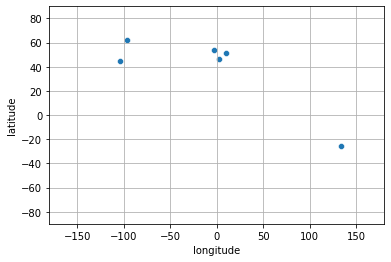

In [4]:
sns.scatterplot(data=df,x='longitude',y='latitude')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.grid()

In [5]:
x = df.iloc[: , [1,2]]
x

,latitude,longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
from sklearn.cluster import KMeans

In [7]:
kmean = KMeans(n_clusters=3 , n_init = 10)
kmean.fit(x)

KMeans(n_clusters=3)

In [8]:
y_pred = kmean.predict(x)
y_pred

array([0, 0, 2, 2, 2, 1])

In [9]:
data_with_cluster = df.copy()
data_with_cluster['cluster'] = y_pred

In [10]:
data_with_cluster

,country,latitude,longitude,language,cluster
0,USA,44.97,-103.77,english,0
1,Canada,62.40,-96.80,english,0
2,France,46.75,2.40,french,2
3,UK,54.01,-2.53,english,2
4,Germany,51.15,10.40,german,2
5,Australia,-25.45,133.11,english,1


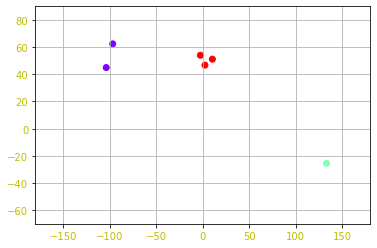

In [11]:
plt.scatter(data_with_cluster['longitude'],data_with_cluster['latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.xticks(c='y')
plt.yticks(c='y')
plt.xlim(-180,180)
plt.ylim(-70,90)
plt.grid()
plt.show()

In [13]:
inertia_val = []
for i in range(1,7):
    model = KMeans(n_clusters=i)
    model.fit(x)
    inertia_val.append(model.inertia_)
inertia_val

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

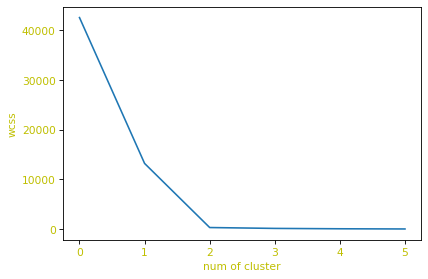

In [14]:
plt.figure(dpi=77)
plt.plot(inertia_val)
plt.xlabel("num of cluster",color='y')
plt.ylabel("wcss",color='y')
plt.xticks(c='y')
plt.yticks(c='y')
plt.show()

In [15]:
kmean.transform(x) #distance between each instance and each cetroid

array([[  9.38597091, 247.12569838, 107.34301012],
       [  9.38597091, 246.12238947, 100.91131035],
       [102.91891687, 149.32496141,   4.01912788],
       [ 97.75554025, 157.20083079,   6.84262783],
       [110.71402553, 144.65581253,   6.99552635],
       [246.44588503,   0.        , 150.35894505]])

In [16]:
kmean.inertia_ #

288.10523333333333

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
num_of_clust = silhouette_score(x,kmean.labels_)
num_of_clust

0.7232813961472381

In [19]:
silhou_score = []
for i in range(2,6):
    model = KMeans(n_clusters=i)
    model.fit(x)
    silhou__val = silhouette_score(x,model.labels_)
    silhou_score.append(silhou__val)
print(silhou_score)

[0.5304645611596158, 0.7232813961472381, 0.4484580204468096, 0.06268959249436608]


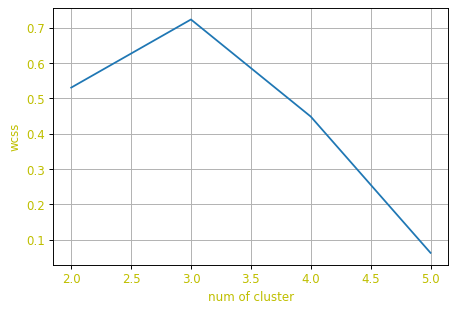

In [20]:
plt.figure(dpi=85)
plt.plot(range(2,6),silhou_score)
plt.xlabel("num of cluster",color='y')
plt.ylabel("wcss",color='y')
plt.xticks(c='y')
plt.yticks(c='y')
plt.grid()
plt.show()